##### Data Camp - Web Scraping in Python

## CH 1 - Introduction to HTML
- what are businesses looking for?
    - comparing competitor prices, satisfaction of cutomers
    - generating potential customers, etc.
-personal projects
    - searching memes
    - search classified ads
    - scrape social content for topics
    - scrape cooking blogs for recipes and reviews
- Example: collecting crime data from local agency publishing and pulling together for AmericanViolence.org
- Three steps in webscraping pipeline
    - setup: understand what you want and find sources
    - aquisition: parse and extract, read in raw data from online, format into usable data
    - processing: analysis and processes 
- Focus of this course in Acquisition using scrapy module in python

###### HyperText Markup Language (HTML)
- Render and display web content
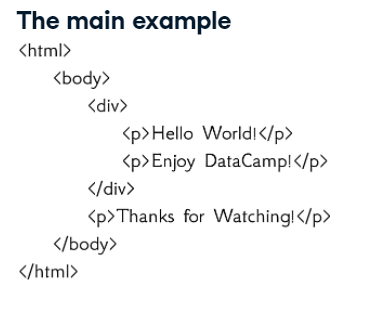
        <starting-tag>  </stopping-tag>  
        <html> = root tag
        <body> = body
        <div> = section of body
        <p> = paragraphs within body

visualize HTML as a tree
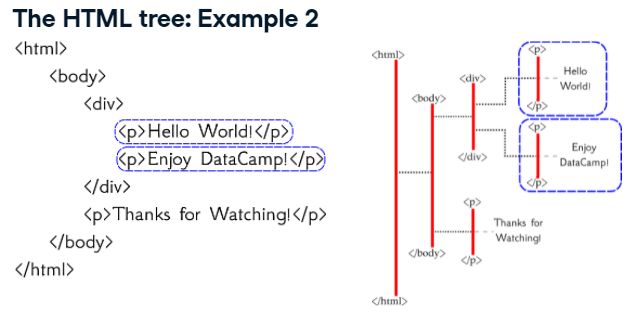

###### HTML Tags and Attributes
- information within HTML tags can be valuable fro extracting link URLS, easier way to select elements
- format:
        <tag-name attrib-name='attrib info'>
            ..element contents..
        </tag-name>

        # example: div tag with 2 attributes, id and class
        <div id='unique-id' class='some-class'>
            ..div element contents..
        </div>
        
        # a tags are for hyperlinks, hef attribute tells what link to go to
        <a href = "https://www.datacamp.com">
            This text links to DataCamp!
        </a>

###### Crash Course in XPath

        xpath = '/html/body/div[2]'
- single forward slash moves one generation forward
- similar to navigating between directories
- brackets specify which sibling to choose (second element here)

- double forward slash (look for all future generations
        
        # direct to all table elements within tntier HTML code
        xpath = '//table'
        
        # direct to all table elements which are descendants of the 2nd div child of the body
        xpath = '/html/body/div[2]//table

In [ ]:
## Navigate to 'Where am I?'

<html>
  <body>
    <div>
      <p>Good Luck!</p>
      <p>Not here...</p>
    </div>
    <div>
      <p>Where am I?</p>
    </div>
  </body>
</html>

xpath = '/html/body/div[2]/p'

- select elements by their attributes using an XPath
- example, direct to the div element within the HTML document whose id attribute is "uid"
    
            #look at all div elements, brackets specify only div elements with id = uid
            xpath = '//div[@id="uid"]'

- Assign to the variable xpath an XPath string which will select all span elements whose class attribute equals "span-class". You do not need to see the actual HTML code to do this!
    
            xpath = '//span[@class="span-class"]'

## CH 2 - XPaths and Selectors

###### XPath Navigation
- beware using brackets
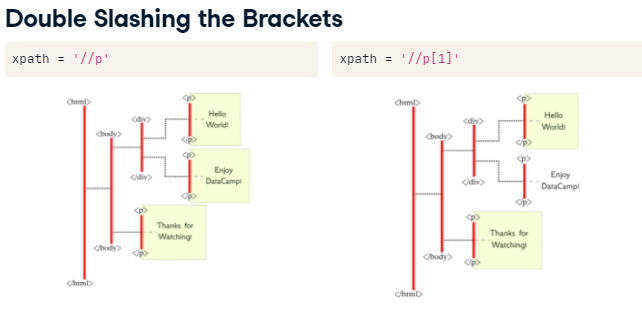

- wildcard *
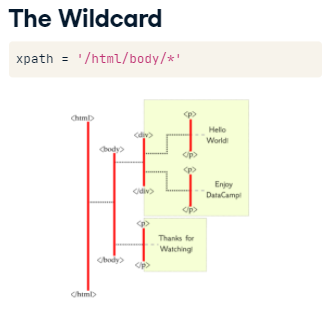

Examples
- The number of elements selected with the XPath string xpath = "/html/body/* is equal to the number of children of the body element; whereas the number of elements selected with the XPath string xpath = "/html/body//*" is equal to the total number of descendants of the body element.

- The number of elements selected by the XPath string xpath = "/*" is equal to the number of root elements within the HTML document, which is typically the 1 html root element.

- The number of elements selected by the Xpath string xpath = "//*" is equal to the total number of elements in the entire HTML document.

###### More XPath
- @ represents 'attribute' (@class, @id, etc)

- direct to all paragraph elements, reduce to those with class attribute = class-1
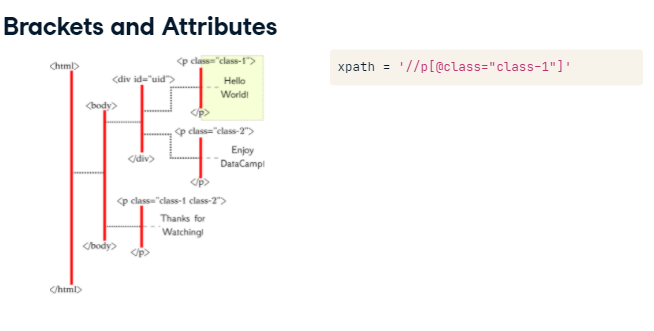

- wildcard, direct to all elements, reduce to elements with id attribute = uid
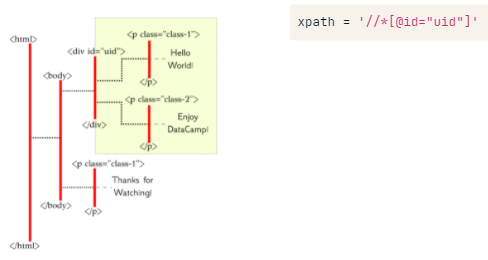

- navigate to div element with id attribute = uid then specify the second paragraph
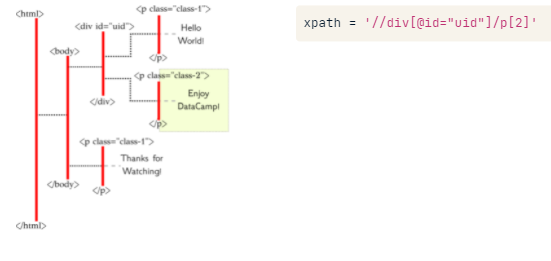

- Xpath 'contains' function notation, L argument attribute name, R argument is string to search for within attribute name

        contains(@attribute-name, "string=expression")
- can inclue substrings that are not desired        
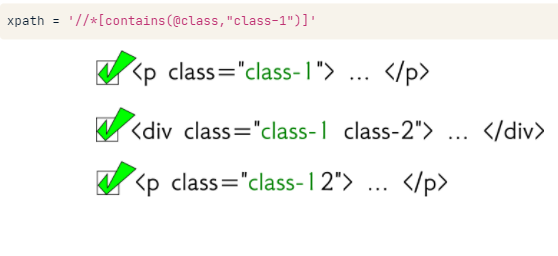

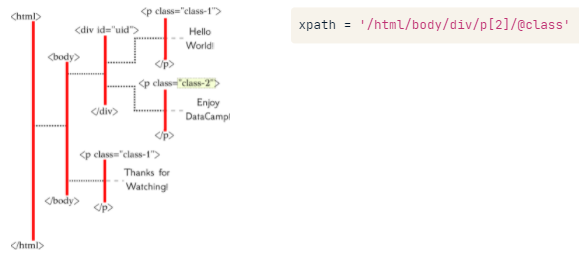

In [ ]:
<html>
  <body>
    <div id="div1" class="class-1">
      <p class="class-1 class-2">Hello World!</p>
      <div id="div2">
        <p id="p2" class="class-2">Choose DataCamp!</p>
      </div>
    </div>
    <div id="div3" class="class-2">
      <p class="class-2">Thanks for Watching!</p>
    </div>
  </body>
</html>

## select the paragraph element containing the text "Thanks for Watching!"
xpath = '//*[@id="div3"]/p'

## select the paragraph element containing the phrase: "Hello World!"
xpath = '//p[@class="class-1 class-2"]'

## select the href attribute value from the DataCamp hyperlink
xpath = '//p[@id="p2"]/a/@href'

In [ ]:
## assign an XPath string to the variable xpath which directs to all href attribute values 
## of the hyperlink a elements whose class attributes contain the string "package-snippet"

xpath = '//a[contains(@class,"package-snippet")]/@href'

###### Introduction to the scrapy Selector

- used to select portions of html using XPath or CSS locator
- setting up a selector
        sel = Selector(text = html) #html = variable containing html as string
- use xpath call within Selector to create new Selectors of specific pieces od HTML code
    - returns SelectorList of Selector objects
            sel.xpath("//p")
            #output for each paragraph
            [<Selector xpath='//p' data='<p>Hello World!</p>'>,
            [<Selector xpath='//p' data='<p>Enjoy DataCamp!</p>'>]
    - extract data from SelectorList
            sel.xpath("//p").extract()
            out: ['<p>Hello World!</p>',
                  '<p>Enjoy DataCamp!</p>']
    - or use extract_first to only pull the first element
            sel.xpath("//p").extract_first()
            out: '<p>Hello World!</p>'
    - or extract other elements from list
            ps = sel.xpath("//p")
            second_p = ps[1]
            second_p.extract()
            out: '<p>Enjoy DataCamp!</p>'
    
- XPath chaining, apply xpath methos over once its already been applied
    - all three get to the same place
    - period is required to "glue" them together:
            sel.xpath('/html/body/div[2]')
            sel.xpath('/html').xpath('./body/div[2]')
            sel.xpath('/html').xpath('./body').xpath('./div[2]')

In [ ]:
from scrapy import Selector

# Create a Selector selecting html as the HTML document
sel = Selector(text=html)

# Create a SelectorList of all div elements in the HTML document
divs = sel.xpath("//div")

# divs[2] is a Selector object, which is the third div element in the HTML code.
divs[2]
out: <Selector xpath='//div' data='<div>Div 3: <p>paragraph 4</p> <p>par...'>

# By chaining, the codedivs[2].xpath('./*') will select all the children of the third div element.
divs[2].xpath('./*')
out: [<Selector xpath='./*' data='<p>paragraph 4</p>'>,
      <Selector xpath='./*' data='<p>paragraph 5</p>'>,
      <Selector xpath='./*' data='<p>paragraph 6</p>'>]

# The code len( divs[2].xpath('./*') ) gives the total number of children of the third div element in the HTML code.
len(divs[2].xpath('./*'))
out: 3

###### Inspecting the HTML

- right click broweser, click "View Source"
- Ctrl + Shift + C to hover over elements and view specific code

        from scrapy import Selector
        import requests
        url = 'https://en.wikipedia.org/wiki/Web_scraping'
        html = requests.get(url).content
        sel = Selector (text=html)

In [ ]:
# Import a scrapy Selector
from scrapy import Selector

# Import requests
import requests

# Create the string html containing the HTML source
html = requests.get( url ).content

# Create the Selector object sel from html
sel = Selector( text=html )

# Print out the number of elements in the HTML document
print( "There are 1020 elements in the HTML document.")
print( "You have found: ", len( sel.xpath('//*') ) )

## CH 3 - CSS Locators, Chaining, and Responses

CSS = Cascading Style Sheets (describes how elements are displayed on screen)

CSS Locators, use > rather than / in xpath
- XPath: /html/body/div
- CSS Loc: html>body>div
    
blank space rather than // (unless first character)
- XPath: //div/span//p
- CSS Loc: div > span p

:nth-of-type(N) rather than [N]:
- XPath: //div/p[2]
- CSS Loc: div > p:nth-of-type(2)
        
Attributes in CSS
- to find element by class, use a period (.)
    - EX: p.class-1 selects all paragraphs from class-1
- to find an element by id, use a pound sign (#)
    - EX: div#uid selects the div element with id equal to uid
    
- select paragraph elements within class-1:
        css_locator = 'div#uid > p.class1'
        OR
        css_locator = '.class1'
        #returns all classes that match, even if multiple classes
        
- Wildcard '*' selects all elements in the HTML document.
        '*.class-1'  == '.class-1'
        '*#uid' == '#uid'

In [ ]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '/html/body/span[1]//a'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'html > body > span:nth-of-type(1) a'

In [ ]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '//div[@id="uid"]/span//h4'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'div#uid > span h4'

In [ ]:
## Assign the variable css_locator a CSS Locator string which directs 
## to the hyperlink (a element) children of all div elements belonging to the class "course-block"

from scrapy import Selector

# Create a selector from the html (of a secret website)
sel = Selector( text = html )

# Fill in the blank
css_locator = 'div.course-block > a'

# Print the number of selected elements.
how_many_elements( css_locator )

In [ ]:
## The CSS Wildcard
## select all children (regardless of tag-type) of the unique element in the HTML document 
## that has its id attribute equal to uid.

# Create the CSS Locator to all children of the element whose id is uid
css_locator = '#uid > *'

###### Attribute and Text Selection

- Using XPath: <xpath-to-element>/@attr-name
        xpath = '//div[@id="uid"]/a/@href'
- Using CSS Locator <css-to-element>::attr(attr-name)
        xpath = 'div#uid > a::attr(href)'
        
- Text Extraction, XPATH
    use text() method within XPath to access text
            <p id="p-example">
                Hello world!
                Try <a href=url>DataCamp</a> today!
            </p>
            sel.xpath('//p[@id="p-example"]/text()').extract()
            out: returns all text in that element, not in future generations
                ['\n Hello world!\n Try', 'today!\n']
            
     double slash returns text in descendents too
            sel.xpath('//p[@id="p-example"]//text()').extract()
            out: ['\n Hello world!\n Try', 'DataCamp', 'today!\n']

- Text Extraction, CSS 
    use ::text method
            sel.css('p#p-example::text').extract()
            out: ['\n Hello world!\n Try', 'today!\n']
    return all descendants with space
            sel.css('p#p-example ::text').extract()
            out: ['\n Hello world!\n Try', 'DataCamp', 'today!\n']

In [ ]:
from scrapy import Selector

# Create a selector object from a secret website
sel = Selector(text=html)

# Select all hyperlinks of div elements belonging to class "course-block"
course_as = sel.css( 'div.course-block > a' )

# Selecting all href attributes chaining with css
hrefs_from_css = course_as.css( '::attr(href)' )

#use . for chaining then @ (attribute) href
# Selecting all href attributes chaining with xpath
hrefs_from_xpath = course_as.xpath('./@href')

In [ ]:
## Assign to the variable xpath an XPath string directing to the text within the 
## paragraph p element with id equal to p3, 
## which does not include the text of future generations of this p element.

# Create an XPath string to the desired text.
xpath = '//p[@id="p3"]/text()'

# Create a CSS Locator string to the desired text.
css_locator = 'p#p3::text'

# Print the text from our selections
print_results( xpath, css_locator )

In [ ]:
## Assign to the variable xpath an XPath string directing to the text within the 
## paragraph p element with id equal to p3, 
## which includes the text of future generations of this p element.

# Create an XPath string to the desired text.
xpath = '//p[@id="p3"]//text()'

# Create a CSS Locator string to the desired text.
css_locator = 'p#p3 ::text'

# Print the text from our selections
print_results( xpath, css_locator )

###### Response Objects

- selector vs. response
- the response has all the tools we learned with Selectors
    - xpath, and css methods followed by extract and extract_first methods
    - response keeps track of the url where HTML was loaded from
    - response helps move from one site to another to ;'crawl' the web while scraping
    
-- Similar to Selector
- xpath method works like a selector
        response/xpath('//div/span[@class="bio"]'
- css method works like selector
        response.css('div > span.bio')
- chaining works like a selector
        response.xpath('//div').css('span.bio')
- data extraction works like a selector
        response.xpath('//div').css('span.bio').extract()  (or .extract_first())
- return object is SelectorList for both Selector and Response

-- Different from Selector
- response keeps track of URL 
        response.url
        out: 'http://...
- lets up follw a new link with follow() method, next_url is the string path of the next url to scrape
        response.follow(next_url)

In [ ]:
## pre-loaded a Response object, named response, with the content from a secret website

# Get the URL to the website loaded in response
this_url = response.url

# Get the title of the website loaded in response
this_title = response.xpath('//title/text()').extract_first()

# Print out our findings
print_url_title( this_url, this_title )

In [ ]:
# Assign to the variable css_locator a CSS Locator string 
## which directs to all hyperlink a elements belonging to the class course-block__link.
css_locator = 'a.course-block__link'

# Select the hyperlink elements from response and sel
response_as = response.css(css_locator)
sel_as = sel.css(css_locator)

# Examine similarity
nr = len( response_as )
ns = len( sel_as )
for i in range( min(nr, ns, 2) ):
  print( "Element %d from response: %s" % (i+1, response_as[i]) )
  print( "Element %d from sel: %s" % (i+1, sel_as[i]) )
  print( "" )

OUT:
Element 1 from response: <Selector xpath="descendant-or-self::a[@class and contains(concat(' ', normalize-space(@class), ' '), ' course-block__link ')]" data='<a class="course-block__link ds-snowp...'>
Element 1 from sel: <Selector xpath="descendant-or-self::a[@class and contains(concat(' ', normalize-space(@class), ' '), ' course-block__link ')]" data='<a class="course-block__link ds-snowp...'>

Element 2 from response: <Selector xpath="descendant-or-self::a[@class and contains(concat(' ', normalize-space(@class), ' '), ' course-block__link ')]" data='<a class="course-block__link ds-snowp...'>
Element 2 from sel: <Selector xpath="descendant-or-self::a[@class and contains(concat(' ', normalize-space(@class), ' '), ' course-block__link ')]" data='<a class="course-block__link ds-snowp...'>

## if we use a response variable to select elements, 
## we are back in the realm of Selectors and SelectorLists.

In [ ]:
## Selecting from a Selection

# Select all desired div elements
divs = response.css('div.course-block')

# Take the first div element
first_div = divs[0]

# Extract the text from the (only) h4 element in first_div
h4_text = first_div.css('h4::text').extract_first()

# Print out the text
print( "The text from the h4 element is:", h4_text )

OUT:
The text from the h4 element is: Introduction to R

In [ ]:
## the variable divs was a SelectorList, so the first element in this list is a Selector object.
type(first_div)
scrapy.selector.unified.Selector

###### Scraping for Reals

Scrape DataCamp course directory and create a list of links to course pages
- goal: list of strings, each is a link to a course page

load html into scrapy Response variable
- manually inspect code, each course belongs to a div element withing class "course-block"
        course_divs = response.css('div.course-block')
        len(course_divs)
        out: 185
        
        first_div = course_divs[0]
        children = first_div.xpath('./*')
        print(len(children)
        out: 3  #three children in the first div
        
        first_child = children[0]  #inspect first child
        print(first_child.extract())
        out: <a class=..../> #contains link
        
        second_child = children[1]
        print(second_child.extract())
        out: <div class=..../> #contains footer of course block
        
        third_child = children[2]
        print(third_child.extract())
        out: <span class=..../>  #contains specific info that is invisible in the course block itself
        
- now ready to extract links, multiple options
- option 1 - use CSS locator to direct to course_block div elements, then to href attributes of hyperlink
        links = response.css('div.course-block > a::attr(href)'.extract()
- option 2 - mix CSS Locator and XPath methods; collect the course divs with a CSS Locator; then direct to the href attributes of the hyperlink child using XPath; extract
        #course blocks
        course_divs = response.css('div.course-block')
        #hyperlink elements
        hrefs = course_divs.xpath('./a/@href')
        #extract links
        links = hrefs.extract()
        
- view list created
        for l in links:
        print(l)

In [ ]:
#The course titles are the text from all the h4 elements within the HTML document.
# Create a SelectorList of the course titles
crs_title_els = response.css('h4::text')

# Extract the course titles 
crs_titles = crs_title_els.extract()

# Print out the course titles 
for el in crs_titles:
  print( ">>", el )

OUT:
>> Introduction to R
>> Data Analysis in R, the data.table Way
>> Data Manipulation in R with dplyr
>> Data Visualization in R with ggvis
>> Reporting with R Markdown
>> Intermediate R
>> Introduction to Machine Learning
>> Cleaning Data in R
>> Intro to Python for Data Science
>> Intermediate R - Practice
>> Predicting Customer Churn in Python

## CH 4 - Spiders

Spider crawls the web over multiple pages, following links if directed
        
        import scrapy
        from scrapy.crawler import CrawlerProcess
        
        #code for spider, websites and how to scrape them
        class SpiderClassName(scrapy.Spider):
        name = "spider_name"
        #code for spider here
        ...
        
        #runs the spider
        process = CrawlerProcess()
        process.crawl(SpiderClassName)
        process.start()
        
- focus on creating the actual spider

        class DCSpider(scrapy.Spider):
        name = 'dc_spider'
        
- start_requests method defines which site(s) we want to scrape and where to send info to be parsed
        def start_requests(self): 
        urls:['https://www.datacamp.com/courses/all']
        for url in urls:
            yield scrapy.Request(url=url,callback = self.parse)
        
- method to parse, most be names the same as in above method
        # in this method, taking html and writing to a file
        def parse(self, response):
        html_file = 'DC_courses.html'
        with open(html_file, 'wb') as fout:
            fout.write(response.body)

In [ ]:
## creating the spider

# Import scrapy library
import scrapy

## pass scrapy.Spider as an argument to the class YourSpider; 
## this will make it so that YourSpider inherits the methods from scrapy.Spider
# Create the spider class
class YourSpider(scrapy.Spider):
  name = "your_spider"
  # start_requests method
  def start_requests(self):
    pass
  # parse method
  def parse(self, response):
    pass
  
# Inspect Your Class
inspect_class(YourSpider)

In [ ]:
## start_requests method, assign two urls to urls varaible

# Import scrapy library
import scrapy

# Create the spider class
class YourSpider( scrapy.Spider ):
  name = "your_spider"
  # start_requests method
  def start_requests( self ):
    urls = ["https://www.datacamp.com", "https://scrapy.org"]
    for url in urls:
      yield url
  # parse method
  def parse( self, response ):
    pass
  
# Inspect Your Class
inspect_class( YourSpider )

###### Start Requests

- must define a method called start_resuests that takes self as input. Scrapy looks for this method by name; define list of urls
        def start_requests(self):
            urls=['url']
            for url in urls:
                yield scrapy.Request(url = url, callback = self.parse)
- yield works like return and produces a scrapy.Request object
- callback argument defines where to send the response variable for processing

- parse method has response as its second input variable (this is varaible passed from scrapy.Requests call
        def parse(self, response):
        # can define any method to parse
        html_file = 'DC_courses.html'
        with open(html_file, 'wb') as fout:

In [ ]:
## self referencing
## f we want to refer to the method parse within the start_requests method, 
## we would need to write self.parse rather than just parse; 
## what writing self does is tell the code: 
## "Look in the same class as start_requests for a method called parse to use."

# Import scrapy library
import scrapy

# Create the spider class
class YourSpider( scrapy.Spider ):
  name = "your_spider"
  # start_requests method
  def start_requests( self ):
    self.print_msg( 'Hello World!' )
  # parse method
  def parse( self, response ):
    pass
  # print_msg method
  def print_msg( self, msg ):
    print( "Calling start_requests in YourSpider prints out:", msg )
  
# Inspect Your Class
inspect_class( YourSpider )

In [ ]:
# Import scrapy library
import scrapy

# Create the spider class
class YourSpider( scrapy.Spider ):
  name = "your_spider"
  # start_requests method
  def start_requests( self ):
    yield scrapy.Request( url="https://www.datacamp.com", callback=self.parse )
  # parse method
  def parse( self, response ):
    pass
  
# Inspect Your Class
inspect_class( YourSpider )

###### Parse and Crawl

    def parse(self, response):
        #input parsing code
        #output to file
        #crawl the web
        
        #extract links and save to file with one link per line
        links = response.css('div.course-block > a::attr(href)').extract()
        filepath = 'DC_links.csv'
        with open(filepath, 'w') as f:
            f.writelines([link + '/n' for link in links])
            
        #another example
        #crawl between sites by following links
        def parse(self, response):
        links = response.css('div.course-block > a::attr(href)').extract()
        for link in links:
            yield response.follow(url=link, callback=self.parse2)
        def parse2(self, response):
            #parse course sites here

In [ ]:
# Import the scrapy library
import scrapy

# Create the Spider class
class DCspider( scrapy.Spider ):
  name = 'dcspider'
  # start_requests method
  def start_requests( self ):
    yield scrapy.Request( url = url_short, callback = self.parse )
  # parse method
  def parse( self, response ):
    # Create an extracted list of course author names
    author_names = response.css('p.course-block__author-name::text').extract()
    # Here we will just return the list of Authors
    return author_names
  
# Inspect the spider
inspect_spider( DCspider )

In [ ]:
## Fill in the two blanks below (one in each of the parsing methods) with the appropriate entries 
## so that the spider can move from the first parsing method to the second correctly.

# Import the scrapy library
import scrapy

# Create the Spider class
class DCdescr( scrapy.Spider ):
  name = 'dcdescr'
  # start_requests method
  def start_requests( self ):
    yield scrapy.Request( url = url_short, callback = self.parse )
  
  # First parse method
  def parse( self, response ):
    links = response.css( 'div.course-block > a::attr(href)' ).extract()
    # Follow each of the extracted links
    for link in links:
      yield response.follow(url=link, callback=self.parse_descr)
      
  # Second parsing method
  def parse_descr( self, response ):
    # Extract course description
    course_descr = response.css( 'p.course__description::text' ).extract_first()
    # For now, just yield the course description
    yield course_descr


# Inspect the spider
inspect_spider( DCdescr )

###### Capstone

    import scrapy
    from scrapy.crawler import CrawlerProcess
    
    class DC_Chapter_Spider(scrapy.Spider):
    
        name = "dc_chapter_spider"
        
        def start_requests(self):
            url = 'https://www.datacamp.com/courses/all'
            yield scrapy.Request(url = url, callback = self.parse_front)
            
        def parse_front(self, response):
            #narrow in on the course blocks where course info is held
            course_blocks = response.css('div.course-block')
            
            #direct to the course links
            course_links = course_blocks.xpath('./a/@href')
            
            #extract the links as a list of strings)
            links_to_follow = course_links.extract()
            
            #follow links to next parser
            for url in links_to_follow:
                yield response.follow(url=url, callback=self.parse_pages)
                
         def parse_pages(self, response):
             #direct to the course title text
             crs_title = response.xpath('//h1[contains(@class="title")]/text()')
             
             #extract and clean course title text
             #use .strip() to pull string rather than list of strings from .extract()
             crs_title_ext = crs_title.extract_first().strip()
             
             #direct to the chapter titles text
             ch_titles = response.css('h4.chapter__title::text')
             
             #extract and clean the chapter titles text
             ch_titles_ext = [t.strip() to t in ch_titles.extract()]
             
             #store this in our dictionary
             dc_dict[crs_title_ext] = ch_titles_ext
             
             
        # Initialize the dictionary **outside** of the Spider class
        dc_dict = dict()

        # Run the Spider
        process = CrawlerProcess()
        process.crawl(DC_Chapter_Spider)
        process.start()

        # Print a preview of courses
        previewCourses(dc_dict)

In [ ]:
# Import scrapy
import scrapy

# Import the CrawlerProcess: for running the spider
from scrapy.crawler import CrawlerProcess

# Create the Spider class
class DC_Description_Spider(scrapy.Spider):
  name = "dc_chapter_spider"
  # start_requests method
  def start_requests(self):
    yield scrapy.Request(url = url_short,
                         callback = self.parse_front)
  # First parsing method
  def parse_front(self, response):
    course_blocks = response.css('div.course-block')
    course_links = course_blocks.xpath('./a/@href')
    links_to_follow = course_links.extract()
    for url in links_to_follow:
      yield response.follow(url = url,
                            callback = self.parse_pages)
  # Second parsing method
  def parse_pages(self, response):
    # Create a SelectorList of the course titles text
    crs_title = response.xpath('//h1[contains(@class,"title")]/text()')
    # Extract the text and strip it clean
    crs_title_ext = crs_title.extract_first().strip()
    # Create a SelectorList of course descriptions text
    crs_descr = response.css( 'p.course__description::text' )
    # Extract the text and strip it clean
    crs_descr_ext = crs_descr.extract_first().strip()
    # Fill in the dictionary
    dc_dict[crs_title_ext] = crs_descr_ext

# Initialize the dictionary **outside** of the Spider class
dc_dict = dict()

# Run the Spider
process = CrawlerProcess()
process.crawl(DC_Description_Spider)
process.start()

# Print a preview of courses
previewCourses(dc_dict)

In [ ]:
# Import scrapy
import scrapy

# Import the CrawlerProcess
from scrapy.crawler import CrawlerProcess

# Create the Spider class
class YourSpider(scrapy.Spider):
  name = 'yourspider'
  # start_requests method
  def start_requests( self ):
    yield scrapy.Request(url = url_short, callback=self.parse)
      
  def parse(self, response):
    # My version of the parser you wrote in the previous part
    crs_titles = response.xpath('//h4[contains(@class,"block__title")]/text()').extract()
    crs_descrs = response.xpath('//p[contains(@class,"block__description")]/text()').extract()
    for crs_title, crs_descr in zip( crs_titles, crs_descrs ):
      dc_dict[crs_title] = crs_descr
    
# Initialize the dictionary **outside** of the Spider class
dc_dict = dict()

# Run the Spider
process = CrawlerProcess()
process.crawl(YourSpider)
process.start()

# Print a preview of courses
previewCourses(dc_dict)